### Определение оптимальной цены подержаного автомобиля по техническим характеристикам

Цель проекта - предсказание оптимальной рыночной цены для подержаного автомобиля с учётом его технических характеристик.

Данные были взяты с сайта ****avito.ru**** 

Критерии поиска - расположение машины в Москве и Московской области. Некатегориальные признаки планируется кодировать ohe или счётчиками.

Выкачивались машины с годом выпуска позже 2000го, чтобы немного облегчить работу по выгрузке.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

#### Обозначения:

* Марка - производитель автомобиля

* Модель - название, используемое производителем для продажи ряда аналогичных автомобилей

* Год выпуска - год, в котором был произведен автомобиль

* Цена - количество денег, которое хочет продавец за данный автомобиль

* Тип кузова - классификация этого автомобиля

* Цвет - собственно цвет этого автомобиля

* Привод - расположение ведущих колёс

* Руль - расположение руля

* Тип двигателя - какое топливо используется

* Состояние - физическая зарактеристика автомобиля

* Валдельцев по ПТС - количество людей, которые пользовались автомобилем в прошлом

* Количетсво дверей - говорит само за себя

* Мощность двигателя - сколько лошадинных сил имеет двигатель автомобиля

* Пробег - сколько на машине проехали километров

* VIN или номер кузова - условное id автомобиля

* Ссылка - ссылка на данное объявление

****Данные выглядят подобным образом:****

In [8]:
data = pd.read_csv('avito.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head().T

,0,1,2,3,4
Марка,Audi,Audi,Audi,Audi,Audi
Модель,A8,A8,Q5,Q5,Q7
Год выпуска,2010,2007,2009,2009,2007
Тип кузова,седан,седан,универсал,внедорожник,внедорожник
Цена,990 000,1 250 000,660 000,769 999,770 000
Объём двигателя,4.2,6.0,2.0,2.0,3.6
Цвет,чёрный,серый,серый,белый,чёрный
Привод,полный,полный,полный,полный,полный
Руль,левый,левый,левый,левый,левый
Тип двигателя,бензин,бензин,бензин,бензин,бензин


Можно заметить, что критерии "Ссылка" и "VIN или номер кузова" нам врятли пригодятся при дальнейшем рассмотрении, т.к. эти данные относятся только конкретно к этой машине, как если бы это был id например.

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41104 entries, 0 to 41103
Data columns (total 18 columns):
Марка                   41104 non-null object
Модель                  41104 non-null object
Год выпуска             41104 non-null int64
Тип кузова              41104 non-null object
Цена                    41104 non-null object
Объём двигателя         41084 non-null object
Цвет                    41104 non-null object
Привод                  41104 non-null object
Руль                    41104 non-null object
Тип двигателя           41104 non-null object
Состояние               34397 non-null object
Владельцев по ПТС       34397 non-null object
Количество дверей       30300 non-null float64
Мощность двигателя      41104 non-null object
Пробег                  34397 non-null object
VIN или номер кузова    41104 non-null object
Коробка передач         41104 non-null object
Ссылка                  41104 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 5.6+ MB


К счастью, пропусков не так много, но большинство признаков категориальные, для них будем использовать OHE или счётчики.

Много вещественных параметров здесь представлены как объекты, надо будет это исправить.

In [9]:
data['Цена'] = [float(x.replace(' ', '')) for x in data['Цена']]
data['Объём двигателя'] = pd.to_numeric(data['Объём двигателя'], errors='coerce')
data['Владельцев по ПТС'] = pd.to_numeric(data['Владельцев по ПТС'], errors='coerce')
data['Мощность двигателя'] = [float(x.split('л')[0]) for x in data['Мощность двигателя']]
data['Пробег'] = [str(x) for x in data['Пробег']]
data['Пробег'] = [float(x.replace('км', '')) for x in data['Пробег']]

In [134]:
data.describe()

,Год выпуска,Цена,Объём двигателя,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег
count,41104.000000,4.110400e+04,41016.000000,31247.000000,30300.00000,41104.000000,34397.000000
mean,2011.547781,1.243985e+06,2.294997,1.835376,4.53835,176.850598,120211.533622
std,4.697973,1.585257e+06,0.899256,0.801513,0.72017,86.320777,71416.135341
min,2000.000000,1.000000e+03,0.600000,1.000000,2.00000,1.000000,1.000000
25%,2008.000000,4.298670e+05,1.600000,1.000000,4.00000,120.000000,75352.000000
50%,2012.000000,7.290000e+05,2.000000,2.000000,5.00000,150.000000,110128.000000
75%,2015.000000,1.400000e+06,2.700000,3.000000,5.00000,211.000000,155000.000000
max,2018.000000,8.000000e+07,6.000000,3.000000,5.00000,1000.000000,1000000.000000


****Посмотрим на то, когда были выпущены предложенные автомобили:****

In [135]:
df_year = data['Год выпуска'].value_counts().sort_index(ascending=False)

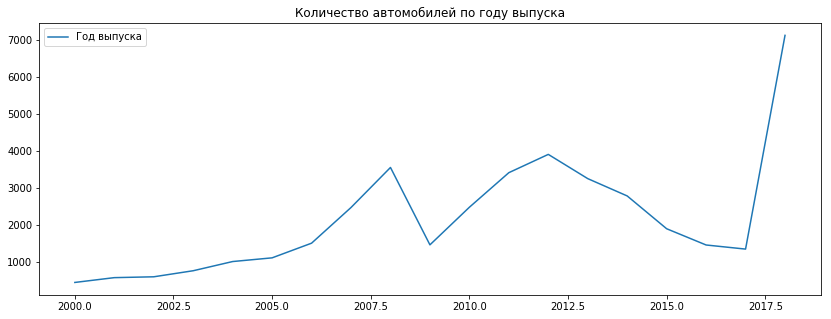

In [164]:
fig = plt.figure(figsize= (14,5))
ax = plt.subplot(111)
ax.plot(df_year)
ax.set_title('Количество автомобилей по году выпуска')
plt.legend()

Сразу заметим, что очень много новых автомобилей, это пока смотрится очень загадочно. Также логичное замечание: в кризис количество продаваемых автомобилей падает, т.к. скорее всего падает спрос на них. 

****Рассмотрим корреляции вещественных признаков:****

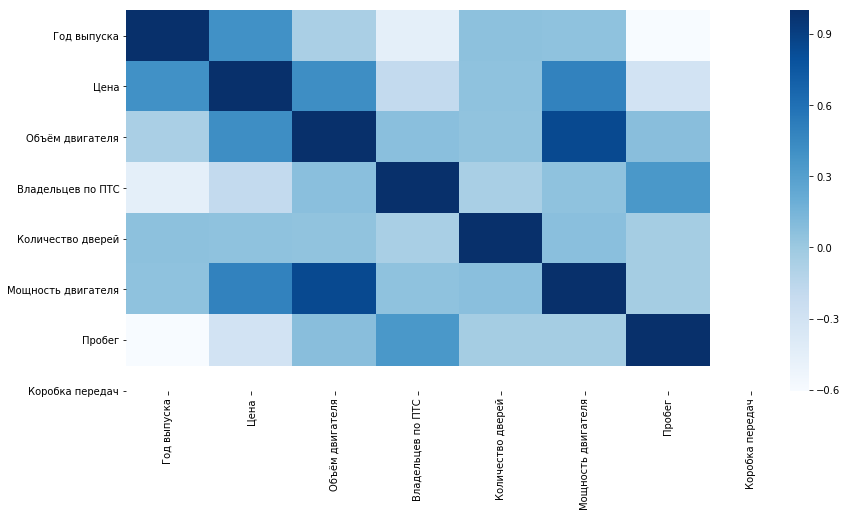

In [140]:
df_corr = data.drop(['Марка', 'Модель', 'Тип кузова', 
                     'Цвет', 'Привод', 'Руль',
                     'Тип двигателя', 'Состояние',
                     'VIN или номер кузова', 'Ссылка'], axis=1)
fig = plt.figure(figsize= (14,7))
sns.heatmap(df_corr.dropna().corr(), 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values, 
            cmap = 'Blues')

Довольно очевидные замечания: пробег обратно пропорционален цене, как и количество хозяева машины. В то время как мощность двигателя и его оъем наоборот положительно влияют на цену.

Также выше видно - что очень часты пропуски в "Количесвто дверей", здесь мы видим, что этот параметр практически не влияет на цену, т.е. можно в случае чего заменить пропуски просто на среднее.

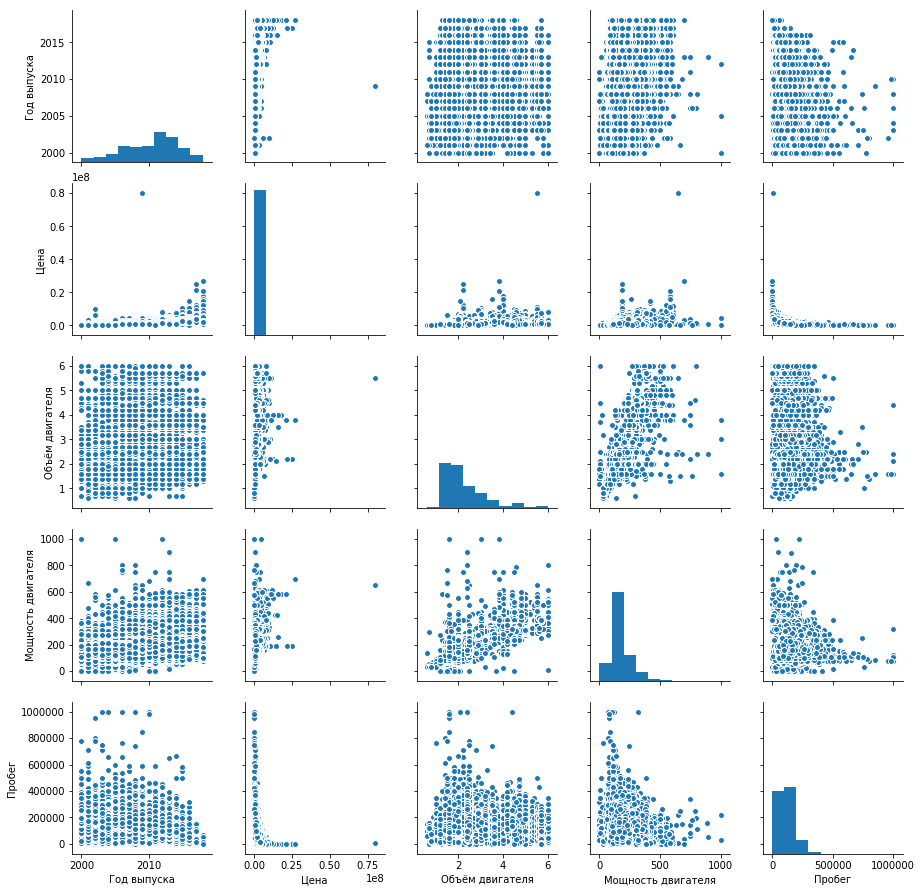

In [168]:
df_corr = df_corr.drop(['Владельцев по ПТС', 'Количество дверей'], axis=1)
sns_plot = sns.pairplot(df_corr.dropna())

Хорошее замечание - цена машины очень сильно зависит от пробега, но только в окрестности нуля. Объем и мощнсоть двигателя похожим образом связаны с другими парамаетрами. Помимо пробега видно, что год выпуска так же ыносит серьёзный вклад, если автомобиль "молодой", то эта зависимость почти линейная. Все эти замечания вцелом интуитивно понятны.

****Как выглядит распределение по типам кузова и средним ценам на автомобили данного типа:****

In [188]:
df_type_price = data.groupby(by='Тип кузова')['Цена'].mean().sort_values(ascending=False)
df_type = data['Тип кузова'].value_counts()

Text(0.5,1,'Количество машин с данным кузовом')

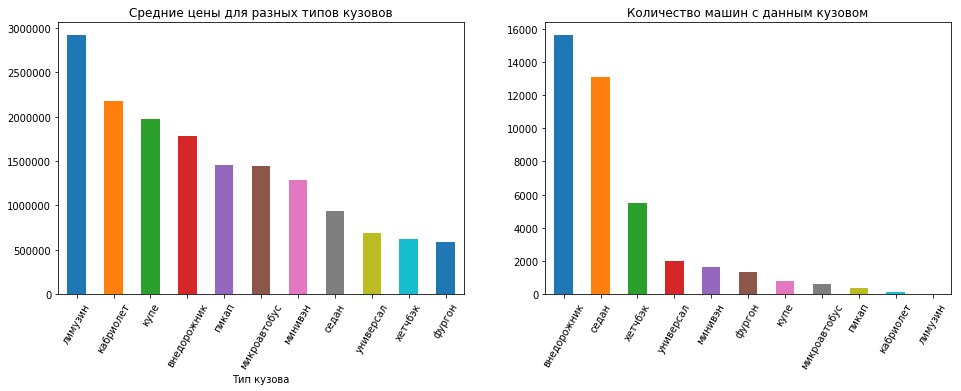

In [192]:
fig = plt.figure(figsize= (16,5))
fig.add_subplot(121)
ax1 = df_type_price.plot(kind='bar', rot=60)
ax1.set_title('Средние цены для разных типов кузовов')

fig.add_subplot(122)
ax2 = df_type.plot(kind='bar', rot=60)
ax2.set_title('Количество машин с данным кузовом')

****Также посмотрим на то как связаны год выпуска и пробг:****

Text(0,0.5,'Пробег')

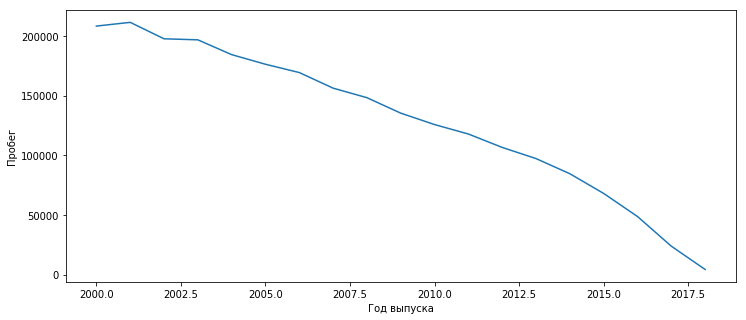

In [200]:
df_kms = data.groupby(by='Год выпуска')['Пробег'].mean()

fig = plt.figure(figsize= (12,5))
ax = plt.subplot(111)
plt.plot(df_kms)
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Пробег')

Обратим внимание, на строки таблицы с nan в поле Пробег. Посмотрим на года выпуска этих машин.

In [20]:
nans = data.Пробег.isnull()
data[nans].groupby(['Год выпуска']).count()

,Марка,Модель,Тип кузова,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег,VIN или номер кузова,Коробка передач,Ссылка
Год выпуска,,,,,,,,,,,,,,,,,
2016,10,10,10,10,10,10,10,10,10,0,0,7,10,0,10,10,10
2017,117,117,117,117,117,117,117,117,117,0,0,73,117,0,117,117,117
2018,6580,6580,6580,6580,6557,6580,6580,6580,6580,0,0,5332,6580,0,6580,6580,6580


Как видно, почти все такие машины были выпущены в 2018 году, поэтому логично предположить, что эти машины просто новые. Так что справедливо выставить им нулевой пробег и нулевое количество владельцев.

In [23]:
data.groupby('Тип кузова').mean()

,Год выпуска,Цена,Объём двигателя,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег
Тип кузова,,,,,,,
внедорожник,2012.761173,1.777722e+06,2.700199,1.740864,4.948488,210.968690,112526.022065
кабриолет,2007.103175,2.173736e+06,3.037398,2.432990,2.203883,263.515873,101624.336134
купе,2010.628536,1.974174e+06,2.608468,2.091211,2.473445,257.239852,97579.719444
лимузин,2009.714286,2.919397e+06,3.955000,1.937500,4.166667,302.285714,115945.444444
микроавтобус,2011.465909,1.442736e+06,2.393617,1.554562,4.485459,141.438312,131565.845890
минивэн,2011.240099,1.286932e+06,2.052260,1.698630,4.773430,145.515470,124198.378127
пикап,2012.520408,1.453802e+06,2.753985,1.747292,3.792642,173.316327,134835.041379
седан,2011.015962,9.419873e+05,2.088546,1.935061,4.210346,166.103483,124970.384582
универсал,2009.345482,6.859597e+05,2.068697,1.928937,4.929515,157.879680,137825.668037


In [30]:
data.groupby('Тип кузова').count()

,Марка,Модель,Год выпуска,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег,VIN или номер кузова,Коробка передач,Ссылка
Тип кузова,,,,,,,,,,,,,,,,,
внедорожник,15618,15618,15618,15618,15589,15618,15618,15618,15618,11602,10809,11473,15618,11602,15618,15618,15618
кабриолет,126,126,126,126,123,126,126,126,126,119,97,103,126,119,126,126,126
купе,813,813,813,813,803,813,813,813,813,720,603,659,813,720,813,813,813
лимузин,21,21,21,21,20,21,21,21,21,18,16,18,21,18,21,21,21
микроавтобус,616,616,616,616,611,616,616,616,616,584,559,447,616,584,616,616,616
минивэн,1616,1616,1616,1616,1615,1616,1616,1616,1616,1399,1314,1099,1616,1399,1616,1616,1616
пикап,392,392,392,392,389,392,392,392,392,290,277,299,392,290,392,392,392
седан,13094,13094,13094,13094,13078,13094,13094,13094,13094,11454,10148,9646,13094,11454,13094,13094,13094
универсал,2003,2003,2003,2003,2003,2003,2003,2003,2003,1946,1759,1589,2003,1946,2003,2003,2003
